# Shaping de la forward curve markit

## Forward Curve TGP

In [1]:
from kdb import *
France_bl = kdb("2022-09-07", "FRANCE_BL")
France_bl_1 = kdb("2022-09-06", "FRANCE_BL")

Data retrieved from kdb for 2022-09-07
Data retrieved from kdb for 2022-09-06


In [39]:
France_bl

,Index,Start Date,Contract type,TGP,Markit,Markit Std,EEX,Ice,Skylight,Risk,Rule,Validation_status,Comment
Date,,,,,,,,,,,,,
2022-09-07,FRANCE_BL,2022-10-01,Month,550.000000,551.605906,2.112905,550.89,550.000000,548.807587,2640.002195,fixed-0.10.1,Validated,Total's price within the threshold -0.1 and 0....
2022-09-07,FRANCE_BL,2022-11-01,Month,1070.000000,1062.026591,4.484267,1059.29,1055.060000,1062.201389,-37070.727739,fixed-0.10.1,Validated,Within spectronpower Bid and spectronpower Ask
2022-09-07,FRANCE_BL,2022-12-01,Month,1115.161290,1151.951202,8.463286,1167.40,1150.100000,1145.380108,-176282.738091,fixed-0.10.1,Validated,ok with markit std
2022-09-07,FRANCE_BL,2022-10-01,Quarter,910.000000,919.515869,3.576896,924.24,916.901087,917.874648,NaN,fixed-0.20.2,Validated,"7. MO disagrees, Traders to update curve"
2022-09-07,FRANCE_BL,2023-01-01,Month,986.000935,996.512737,10.032694,1003.75,1018.920000,996.231813,510574.018151,fixed-0.10.1,Validated,ok with markit std
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-07,FRANCE_BL,2030-01-01,Quarter,165.609003,NaN,NaN,NaN,NaN,NaN,NaN,fixed-0.20.2,NotValidated,
2022-09-07,FRANCE_BL,2030-04-01,Month,92.142939,NaN,NaN,NaN,NaN,NaN,NaN,fixed-0.50.5,NotValidated,
2022-09-07,FRANCE_BL,2030-05-01,Month,73.848208,NaN,NaN,NaN,NaN,NaN,NaN,fixed-0.50.5,NotValidated,


In [50]:
Markit = France_bl.loc[:, ["Contract type", "TGP", "Markit", "Markit Std", "Start Date"]]
Markit = Markit.set_index(['Start Date'])
Markit_1 = France_bl_1.loc[:, ["Contract type", "TGP", "Markit", "Markit Std", "Start Date"]]
Markit_1 = Markit_1.set_index(['Start Date'])
Markit_1.columns = ["Contract type","TGP-1","Markit-1", "Markit Std-1"]

Markit

,Contract type,TGP,Markit,Markit Std
Start Date,,,,
2022-10-01,Month,550.000000,551.605906,2.112905
2022-11-01,Month,1070.000000,1062.026591,4.484267
2022-12-01,Month,1115.161290,1151.951202,8.463286
2022-10-01,Quarter,910.000000,919.515869,3.576896
2023-01-01,Month,986.000935,996.512737,10.032694
...,...,...,...,...
2030-01-01,Quarter,165.609003,NaN,NaN
2030-04-01,Month,92.142939,NaN,NaN
2030-05-01,Month,73.848208,NaN,NaN


In [51]:
a = pd.merge(Markit, Markit_1,on=["Start Date","Contract type"], how = 'left')  
a["Delta"] = a["Markit"] - a["Markit-1"]
a=a.loc["2023"]
a = a.sort_index()
a = a.iloc[np.lexsort([a.index, a['Contract type']])]
a

,Contract type,TGP,Markit,Markit Std,TGP-1,Markit-1,Markit Std-1,Delta
Start Date,,,,,,,,
2023-01-01,Month,986.000935,996.512737,10.032694,1060.925822,1062.179653,13.400330,-65.666917
2023-02-01,Month,965.771202,979.779136,12.284384,1047.007589,1041.949920,16.989373,-62.170785
2023-03-01,Month,745.883141,775.109135,17.201776,795.002807,822.061859,25.258023,-46.952724
2023-04-01,Month,411.548842,399.578565,7.689807,428.651527,425.561769,9.774320,-25.983204
2023-05-01,Month,355.116657,350.139604,6.441934,375.709760,369.129585,6.408214,-18.989981
2023-06-01,Month,381.239413,373.213967,4.685226,396.611379,395.252340,4.339658,-22.038373
2023-07-01,Month,362.470638,359.683515,4.123829,360.634036,374.753852,8.477695,-15.070337
2023-08-01,Month,338.160980,338.189144,3.332287,340.178911,350.444194,9.349160,-12.255050
2023-09-01,Month,395.785888,391.021164,7.908819,396.618508,408.069102,9.329025,-17.047938


In [11]:
a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"Markit-1"][0]

588.40754838

In [10]:
a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"Markit"][0]

558.97825791

In [6]:
a.loc[(a['Contract type'] =='Quarter')  , "Markit"] #& (a.index =='2023-03-01') 

Start Date
2023-01-01    915.194464
2023-04-01    375.373413
2023-07-01    362.905758
2023-10-01    580.373759
Name: Markit, dtype: float64

In [54]:
spread = pd.DataFrame(index = a.loc[a['Contract type'] =='Quarter' , :].index,)

# determination du spread entre cal et quarters de markit - 1
spread.loc["2023-01-01", "Q spread - 1"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"Markit-1"][0] - a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Quarter'), "Markit-1"][0]
spread.loc["2023-04-01", "Q spread - 1"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"Markit-1"][0] - a.loc[(a.index =='2023-04-01') & (a['Contract type'] =='Quarter'), "Markit-1"][0]
spread.loc["2023-07-01", "Q spread - 1"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"Markit-1"][0] - a.loc[(a.index =='2023-07-01') & (a['Contract type'] =='Quarter'), "Markit-1"][0]
spread.loc["2023-10-01", "Q spread - 1"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"Markit-1"][0] - a.loc[(a.index =='2023-10-01') & (a['Contract type'] =='Quarter'), "Markit-1"][0]


# determination du nv prix avec le spread markit-1 
spread.loc["2023-01-01", "New price"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"TGP"][0] - spread["Q spread - 1"][0]
spread.loc["2023-04-01", "New price"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"TGP"][0] - spread["Q spread - 1"][1]
spread.loc["2023-07-01", "New price"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"TGP"][0] - spread["Q spread - 1"][2]
spread.loc["2023-10-01", "New price"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Year'),"TGP"][0] - spread["Q spread - 1"][3]

# prix TGP
spread.loc["2023-01-01", "TGP"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Quarter'),"TGP"][0] 
spread.loc["2023-04-01", "TGP"] = a.loc[(a.index =='2023-04-01') & (a['Contract type'] =='Quarter'),"TGP"][0] 
spread.loc["2023-07-01", "TGP"] = a.loc[(a.index =='2023-07-01') & (a['Contract type'] =='Quarter'),"TGP"][0] 
spread.loc["2023-10-01", "TGP"] = a.loc[(a.index =='2023-10-01') & (a['Contract type'] =='Quarter'),"TGP"][0] 

# prix markit
spread.loc["2023-01-01", "Markit"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Quarter'),"Markit"][0]
spread.loc["2023-04-01", "Markit"] = a.loc[(a.index =='2023-04-01') & (a['Contract type'] =='Quarter'),"Markit"][0]
spread.loc["2023-07-01", "Markit"] = a.loc[(a.index =='2023-07-01') & (a['Contract type'] =='Quarter'),"Markit"][0]
spread.loc["2023-10-01", "Markit"] = a.loc[(a.index =='2023-10-01') & (a['Contract type'] =='Quarter'),"Markit"][0]


# delta entre prix calcule et prix markit
spread["Prix calcule / markit "] = spread["New price"] - spread["Markit"]


# markit std 
spread.loc["2023-01-01", "Markit std"] = a.loc[(a.index =='2023-01-01') & (a['Contract type'] =='Quarter'),"Markit Std"][0]
spread.loc["2023-04-01", "Markit std"] = a.loc[(a.index =='2023-04-01') & (a['Contract type'] =='Quarter'),"Markit Std"][0]
spread.loc["2023-07-01", "Markit std"] = a.loc[(a.index =='2023-07-01') & (a['Contract type'] =='Quarter'),"Markit Std"][0]
spread.loc["2023-10-01", "Markit std"] = a.loc[(a.index =='2023-10-01') & (a['Contract type'] =='Quarter'),"Markit Std"][0]

spread

,Q spread - 1,New price,TGP,Markit,Prix calcule / markit,Markit std
Start Date,,,,,,
2023-01-01,-383.422963,958.422963,897.000000,915.194464,43.228499,1.603619
2023-04-01,192.296888,382.703112,382.332571,375.373413,7.329699,4.342573
2023-07-01,210.229588,364.770412,365.143008,362.905758,1.864654,2.003562
2023-10-01,-24.158115,599.158115,660.430209,580.373759,18.784356,11.392279


In [55]:
a

,Contract type,TGP,Markit,Markit Std,TGP-1,Markit-1,Markit Std-1,Delta
Start Date,,,,,,,,
2023-01-01,Month,986.000935,996.512737,10.032694,1060.925822,1062.179653,13.400330,-65.666917
2023-02-01,Month,965.771202,979.779136,12.284384,1047.007589,1041.949920,16.989373,-62.170785
2023-03-01,Month,745.883141,775.109135,17.201776,795.002807,822.061859,25.258023,-46.952724
2023-04-01,Month,411.548842,399.578565,7.689807,428.651527,425.561769,9.774320,-25.983204
2023-05-01,Month,355.116657,350.139604,6.441934,375.709760,369.129585,6.408214,-18.989981
2023-06-01,Month,381.239413,373.213967,4.685226,396.611379,395.252340,4.339658,-22.038373
2023-07-01,Month,362.470638,359.683515,4.123829,360.634036,374.753852,8.477695,-15.070337
2023-08-01,Month,338.160980,338.189144,3.332287,340.178911,350.444194,9.349160,-12.255050
2023-09-01,Month,395.785888,391.021164,7.908819,396.618508,408.069102,9.329025,-17.047938


## Smoothing Curve TGP

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pmdarima as pm

France_bl_quarters = France_bl_1.loc[France_bl_1["Contract type"] == "Quarter", :]
France_bl_quarters = France_bl_quarters[["Start Date", "TGP"]]
France_bl_quarters = France_bl_quarters.set_index(['Start Date'])
France_bl_quarters.head(5)

,TGP
Start Date,
2022-10-01,1025.000000
2023-01-01,1060.000000
2023-04-01,367.507330
2023-07-01,327.968085
2023-10-01,818.627926


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
fit1 = SimpleExpSmoothing(France_bl_quarters, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(France_bl_quarters, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(France_bl_quarters, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])


c:\Users\rmolli\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\rmolli\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\rmolli\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


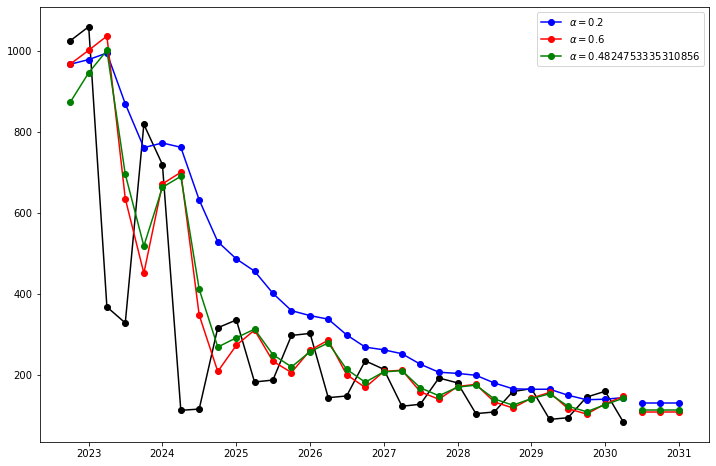

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(France_bl_quarters, marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

c:\Users\rmolli\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\rmolli\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\rmolli\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


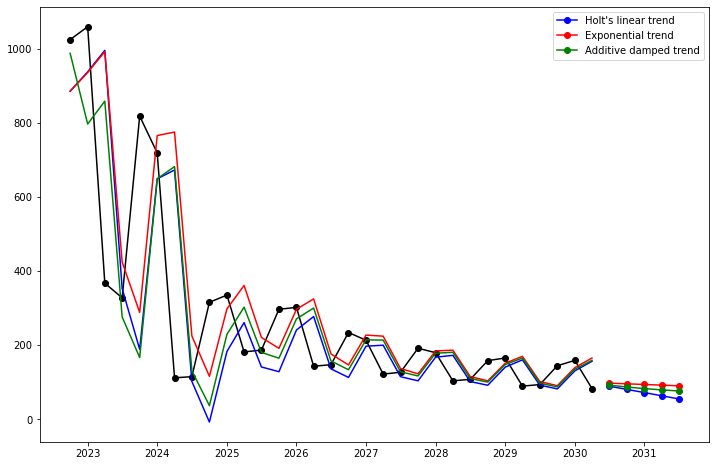

In [ ]:
fit1 = Holt(France_bl_quarters, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(France_bl_quarters, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(France_bl_quarters, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(France_bl_quarters, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])